Weather meta data - https://www.worldweatheronline.com/weather-api/api/docs/local-city-town-weather-api.aspx

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv(r"C:\Users\misja\OneDrive\Desktop\JAHNAVI\NEU\MLOpsProject\mlops-project\experiments\all_merged_zones_weather_demand_data.csv")

C:\Users\misja\AppData\Local\Temp\ipykernel_20156\4057512096.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\misja\OneDrive\Desktop\JAHNAVI\NEU\MLOpsProject\mlops-project\experiments\all_merged_zones_weather_demand_data.csv")


In [ ]:
df.head(5)

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone
0,2019-06-05T17,82,12,176,0.3,0.0,81,9,5,1008,...,82,23,36,32,90,6,ERCO - Coast,13395,megawatthours,COAS
1,2019-06-05T17,85,6,113,0.0,0.0,25,10,6,1008,...,85,9,14,29,84,7,ERCO - Far West,3442,megawatthours,FWES
2,2019-06-05T17,81,11,356,5.8,0.2,65,10,6,1009,...,81,17,28,30,85,6,ERCO - North Central,14665,megawatthours,NCEN
3,2019-06-05T17,84,6,116,0.0,0.0,62,10,6,1008,...,84,13,20,31,89,7,ERCO - North,1175,megawatthours,NRTH
4,2019-06-05T17,84,4,116,0.0,0.0,68,9,5,1008,...,84,10,16,33,91,7,ERCO - South Central,7760,megawatthours,SCEN


In [ ]:
max(df['datetime'])

'2023-12-31T00'

In [ ]:
min(df['datetime'])

'2019-06-05T17'

So data is existing from June 5th,2019 (5:00pm) to Dec 31st,2023 (12:00 am)

# Data Inspection

In [ ]:
df.describe(include='all')

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone
count,395000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,...,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000,395000.000000,395000,395000.0
unique,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1,22.0
top,2022-06-05T18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ISNE - Northeast Mass.,NaN,megawatthours,4008.0
freq,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40000,NaN,395000,40000.0
mean,NaN,66.579785,8.168651,132.344516,0.119475,0.003773,64.917511,9.381018,5.570008,1015.587673,...,65.367643,13.779873,22.174899,19.349851,66.822066,3.159423,NaN,4020.979803,NaN,NaN
std,NaN,17.972588,4.202030,52.793503,0.631323,0.025883,20.978932,1.852144,1.198946,6.598225,...,19.851933,6.308505,10.151022,11.809619,21.250407,2.627255,NaN,4566.916950,NaN,NaN
min,NaN,-1.000000,0.000000,113.000000,0.000000,0.000000,5.000000,0.000000,0.000000,972.000000,...,-19.000000,0.000000,0.000000,-28.000000,-19.000000,1.000000,NaN,190.000000,NaN,NaN
25%,NaN,55.000000,5.000000,113.000000,0.000000,0.000000,49.000000,10.000000,6.000000,1011.000000,...,53.000000,9.000000,15.000000,12.000000,53.000000,1.000000,NaN,1307.000000,NaN,NaN
50%,NaN,69.000000,8.000000,113.000000,0.000000,0.000000,67.000000,10.000000,6.000000,1015.000000,...,69.000000,13.000000,21.000000,20.000000,69.000000,1.000000,NaN,2075.000000,NaN,NaN
75%,NaN,80.000000,11.000000,119.000000,0.000000,0.000000,82.000000,10.000000,6.000000,1020.000000,...,80.000000,18.000000,28.000000,28.000000,83.000000,5.000000,NaN,4233.000000,NaN,NaN


In [ ]:
df.dtypes

,0
datetime,object
tempF,int64
windspeedMiles,int64
weatherCode,int64
precipMM,float64
precipInches,float64
humidity,int64
visibility,int64
visibilityMiles,int64
pressure,int64


In [ ]:
df['value-units'].unique()

array(['megawatthours'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395000 entries, 0 to 394999
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   datetime         395000 non-null  object 
 1   tempF            395000 non-null  int64  
 2   windspeedMiles   395000 non-null  int64  
 3   weatherCode      395000 non-null  int64  
 4   precipMM         395000 non-null  float64
 5   precipInches     395000 non-null  float64
 6   humidity         395000 non-null  int64  
 7   visibility       395000 non-null  int64  
 8   visibilityMiles  395000 non-null  int64  
 9   pressure         395000 non-null  int64  
 10  pressureInches   395000 non-null  int64  
 11  cloudcover       395000 non-null  int64  
 12  HeatIndexC       395000 non-null  int64  
 13  HeatIndexF       395000 non-null  int64  
 14  DewPointC        395000 non-null  int64  
 15  DewPointF        395000 non-null  int64  
 16  WindChillC       395000 non-null  int6

# Handling missing values

In [ ]:
df.isnull().sum()

,0
datetime,0
tempF,0
windspeedMiles,0
weatherCode,0
precipMM,0
precipInches,0
humidity,0
visibility,0
visibilityMiles,0
pressure,0


No missing values

In [ ]:
df[df.duplicated()]

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone
355001,2020-06-05T17,80,11,119,0.0,0.0,56,9,5,1010,...,80,20,31,28,83,6,ISNE - Northeast Mass.,3174,megawatthours,4008
355003,2020-06-05T18,78,12,119,0.0,0.0,59,9,5,1010,...,78,18,29,27,81,1,ISNE - Northeast Mass.,3197,megawatthours,4008
355005,2020-06-05T19,76,12,119,0.0,0.0,61,10,5,1010,...,76,18,30,26,79,1,ISNE - Northeast Mass.,3219,megawatthours,4008
355007,2020-06-05T20,75,12,119,0.0,0.0,64,10,6,1010,...,75,19,30,26,78,1,ISNE - Northeast Mass.,3320,megawatthours,4008
355009,2020-06-05T21,74,12,119,0.0,0.0,67,10,6,1010,...,74,19,31,25,77,1,ISNE - Northeast Mass.,3403,megawatthours,4008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384995,2022-12-30T22,42,10,113,0.0,0.0,82,10,6,1023,...,37,18,28,3,37,1,ISNE - Northeast Mass.,2748,megawatthours,4008
384996,2022-12-30T23,42,8,113,0.0,0.0,82,10,6,1023,...,37,16,26,3,37,1,ISNE - Northeast Mass.,2820,megawatthours,4008
384997,2022-12-30T23,36,5,116,0.0,0.0,93,10,6,1024,...,32,10,16,0,32,1,ISNE - Western/Central Mass.,1969,megawatthours,4007
384998,2022-12-31T00,36,5,116,0.0,0.0,94,10,6,1024,...,31,10,16,0,31,1,ISNE - Western/Central Mass.,1932,megawatthours,4007


Normalization and Label Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Step 1: Extract the month from the 'datetime' column
df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.month

# Step 2: Normalize only numerical columns (int64 and float64)

# Select only the proper numerical columns (exclude 'object' type)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMax scaling to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Step 3: Convert object columns to strings and label encode them

# Select categorical columns (object type)
categorical_columns = df.select_dtypes(include=['object']).columns

# Ensure uniform data type by converting all categorical values to strings
df[categorical_columns] = df[categorical_columns].astype(str)

# Apply label encoding to each categorical column
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Step 4: Check the DataFrame
df.head()




,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone,month
0,2019-06-05 17:00:00,0.728070,0.315789,0.228261,0.008065,0.000000,0.800000,0.9,0.833333,0.500000,...,0.359375,0.346154,0.779221,0.784173,0.5,0,0.470280,0,8,6
1,2019-06-05 17:00:00,0.754386,0.157895,0.000000,0.000000,0.000000,0.210526,1.0,1.000000,0.500000,...,0.140625,0.134615,0.740260,0.741007,0.6,2,0.115816,0,10,6
2,2019-06-05 17:00:00,0.719298,0.289474,0.880435,0.155914,0.133333,0.631579,1.0,1.000000,0.513889,...,0.265625,0.269231,0.753247,0.748201,0.5,4,0.515510,0,11,6
3,2019-06-05 17:00:00,0.745614,0.157895,0.010870,0.000000,0.000000,0.600000,1.0,1.000000,0.500000,...,0.203125,0.192308,0.766234,0.776978,0.6,3,0.035080,0,12,6
4,2019-06-05 17:00:00,0.745614,0.105263,0.010870,0.000000,0.000000,0.663158,0.9,0.833333,0.500000,...,0.156250,0.153846,0.792208,0.791367,0.6,6,0.269596,0,13,6


# Visualizations and Feature selection

In [ ]:
df.head()

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone,month
0,2019-06-05 17:00:00,0.728070,0.315789,0.228261,0.008065,0.000000,0.800000,0.9,0.833333,0.500000,...,0.359375,0.346154,0.779221,0.784173,0.5,0,0.470280,0,8,6
1,2019-06-05 17:00:00,0.754386,0.157895,0.000000,0.000000,0.000000,0.210526,1.0,1.000000,0.500000,...,0.140625,0.134615,0.740260,0.741007,0.6,2,0.115816,0,10,6
2,2019-06-05 17:00:00,0.719298,0.289474,0.880435,0.155914,0.133333,0.631579,1.0,1.000000,0.513889,...,0.265625,0.269231,0.753247,0.748201,0.5,4,0.515510,0,11,6
3,2019-06-05 17:00:00,0.745614,0.157895,0.010870,0.000000,0.000000,0.600000,1.0,1.000000,0.500000,...,0.203125,0.192308,0.766234,0.776978,0.6,3,0.035080,0,12,6
4,2019-06-05 17:00:00,0.745614,0.105263,0.010870,0.000000,0.000000,0.663158,0.9,0.833333,0.500000,...,0.156250,0.153846,0.792208,0.791367,0.6,6,0.269596,0,13,6


## Average demand by Location

In [ ]:
subba_group = df.groupby('subba-name')

In [ ]:
avg_demand_subba = subba_group['value'].mean().sort_values(ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '4'),
  Text(1, 0, '0'),
  Text(2, 0, '6'),
  Text(3, 0, '2'),
  Text(4, 0, '5'),
  Text(5, 0, '8'),
  Text(6, 0, '11'),
  Text(7, 0, '15'),
  Text(8, 0, '1'),
  Text(9, 0, '13'),
  Text(10, 0, '7'),
  Text(11, 0, '10'),
  Text(12, 0, '9'),
  Text(13, 0, '3'),
  Text(14, 0, '12'),
  Text(15, 0, '14')])

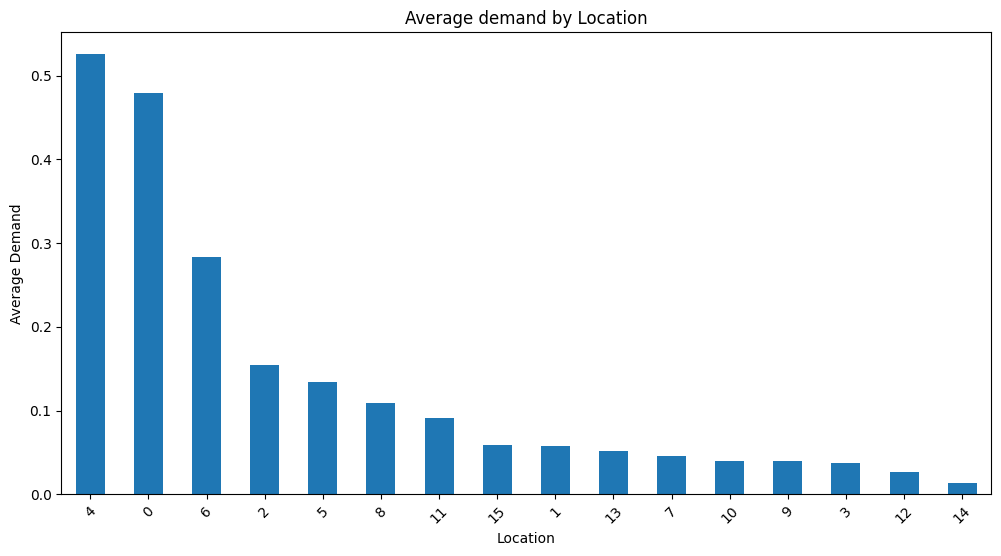

In [ ]:
plt.figure(figsize=(12,6))
avg_demand_subba.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Average Demand')
plt.title('Average demand by Location')
plt.xticks(rotation = 45)

## Average Demand per Month

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '6'),
  Text(1, 0, '7'),
  Text(2, 0, '8'),
  Text(3, 0, '9'),
  Text(4, 0, '10'),
  Text(5, 0, '11'),
  Text(6, 0, '12')])

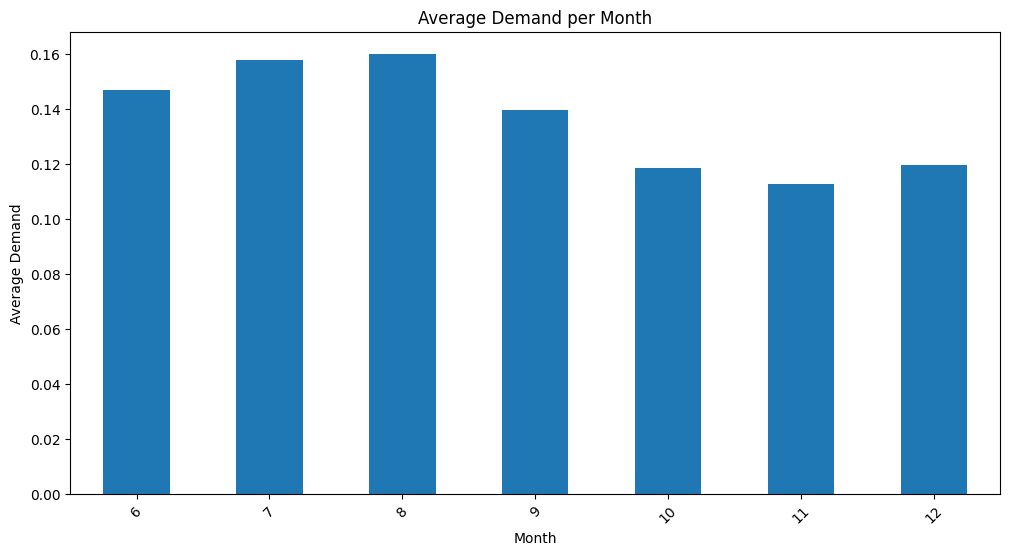

In [ ]:
month_demand_group = df.groupby('month')
avg_demand_month = month_demand_group['value'].mean()

plt.figure(figsize = (12,6))
avg_demand_month.plot(kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.title('Average Demand per Month')
plt.xticks(rotation = 45)

## Correlation between Weather Factors and Demand Value

In [ ]:
df.columns

Index(['datetime', 'tempF', 'windspeedMiles', 'weatherCode', 'precipMM',
       'precipInches', 'humidity', 'visibility', 'visibilityMiles', 'pressure',
       'pressureInches', 'cloudcover', 'HeatIndexC', 'HeatIndexF', 'DewPointC',
       'DewPointF', 'WindChillC', 'WindChillF', 'WindGustMiles',
       'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF', 'uvIndex', 'subba-name',
       'value', 'value-units', 'zone', 'month'],
      dtype='object')

Text(0.5, 1.0, 'Correlation between Weather Factors and Demand Value')

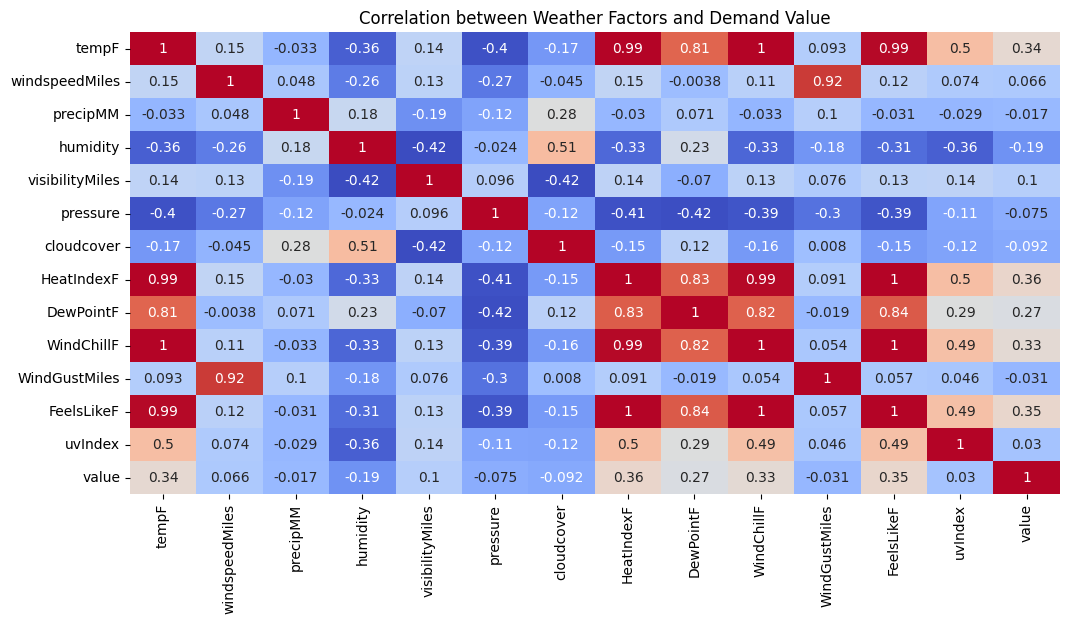

In [ ]:
weather_factors_value = df[['tempF', 'windspeedMiles', 'precipMM', 'humidity', 'visibilityMiles', 'pressure', 'cloudcover', 'HeatIndexF', 'DewPointF', 'WindChillF', 'WindGustMiles', 'FeelsLikeF', 'uvIndex', 'value']]
weather_corr = weather_factors_value.corr()

plt.figure(figsize = (12,6))
sns.heatmap(weather_corr, annot = True, cmap = 'coolwarm', cbar=False)
plt.title('Correlation between Weather Factors and Demand Value')

In [ ]:
# Step 1: Find pairs of features with correlation > 0.7
threshold = 0.7
high_corr_pairs = [(weather_corr.columns[i], weather_corr.columns[j], weather_corr.iloc[i, j])
                   for i in range(len(weather_corr.columns)) for j in range(i)
                   if abs(weather_corr.iloc[i, j]) > threshold]

# Step 2: Evaluate how each feature in the pair is correlated with 'value'
print("Highly correlated feature pairs and their correlation with 'value':")
for feature1, feature2, corr_value in high_corr_pairs:
    corr_feature1_value = weather_corr.loc[feature1, 'value']
    corr_feature2_value = weather_corr.loc[feature2, 'value']
    print(f"Pair: {feature1} and {feature2} - Correlation: {corr_value:.2f}")
    print(f"  {feature1} with 'value': {corr_feature1_value:.2f}")
    print(f"  {feature2} with 'value': {corr_feature2_value:.2f}")

    # Compare correlations with 'value' and suggest which to keep
    if abs(corr_feature1_value) > abs(corr_feature2_value):
        print(f"  => {feature1} is more correlated with 'value', consider keeping it.")
    else:
        print(f"  => {feature2} is more correlated with 'value', consider keeping it.")
    print('-' * 80)

Highly correlated feature pairs and their correlation with 'value':
Pair: HeatIndexF and tempF - Correlation: 0.99
  HeatIndexF with 'value': 0.36
  tempF with 'value': 0.34
  => HeatIndexF is more correlated with 'value', consider keeping it.
--------------------------------------------------------------------------------
Pair: DewPointF and tempF - Correlation: 0.81
  DewPointF with 'value': 0.27
  tempF with 'value': 0.34
  => tempF is more correlated with 'value', consider keeping it.
--------------------------------------------------------------------------------
Pair: DewPointF and HeatIndexF - Correlation: 0.83
  DewPointF with 'value': 0.27
  HeatIndexF with 'value': 0.36
  => HeatIndexF is more correlated with 'value', consider keeping it.
--------------------------------------------------------------------------------
Pair: WindChillF and tempF - Correlation: 1.00
  WindChillF with 'value': 0.33
  tempF with 'value': 0.34
  => tempF is more correlated with 'value', consider k

Looking at the plot - it can be decided to drop
1. 'DewPointF', 'WindChillF', 'HeatIndexF', 'FeelsLikeF' and 'tempF' - are highly correlated
2. 'windspeedMiles' and 'WindGustMiles' are also highly correlated with each other

Considering how they are correlated with the target variable ('Value') - we will drop few features

Should look into ERCO - Far West

## Variance Inflation Factor (VIF)

In [ ]:
from statsmodels.stats. outliers_influence import variance_inflation_factor

features = weather_factors_value.drop(columns=['value'])
vif_data = pd.DataFrame()
vif_data['features'] = features.columns

vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

vif_data

,features,VIF
0,tempF,13579.876459
1,windspeedMiles,33.003767
2,precipMM,1.162972
3,humidity,84.430420
4,visibilityMiles,26.420604
5,pressure,40.779885
6,cloudcover,3.228937
7,HeatIndexF,10153.210715
8,DewPointF,588.434773
9,WindChillF,16325.741193


1. Very High VIF - tempF, HeatIndexF, WindChillF, FeelsLikeF
2. Moderate VIF - windspeedMiles, humidity, visibilityMiles,pressure, DewPointF, WindGustMiles
3. Low VIF - precipMM, cloudcover, uvindex


So the columns initially which can be considered are - 'datetime', 'tempF', 'windspeedMiles', 'precipMM', 'humidity', 'visibilityMiles', 'pressure', 'cloudcover', 'HeatIndexF', 'DewPointF', 'WindChillF', 'WindGustMiles', 'FeelsLikeF', 'uvIndex', 'subba-name','value', 'value-units', 'zone', 'Month' - Dropping selected columns as few features are captured in different units


The rest few columns to be dropped is yet to be decided based on other factors

In [ ]:
df.head()

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone,month
0,2019-06-05 17:00:00,0.728070,0.315789,0.228261,0.008065,0.000000,0.800000,0.9,0.833333,0.500000,...,0.359375,0.346154,0.779221,0.784173,0.5,0,0.470280,0,8,6
1,2019-06-05 17:00:00,0.754386,0.157895,0.000000,0.000000,0.000000,0.210526,1.0,1.000000,0.500000,...,0.140625,0.134615,0.740260,0.741007,0.6,2,0.115816,0,10,6
2,2019-06-05 17:00:00,0.719298,0.289474,0.880435,0.155914,0.133333,0.631579,1.0,1.000000,0.513889,...,0.265625,0.269231,0.753247,0.748201,0.5,4,0.515510,0,11,6
3,2019-06-05 17:00:00,0.745614,0.157895,0.010870,0.000000,0.000000,0.600000,1.0,1.000000,0.500000,...,0.203125,0.192308,0.766234,0.776978,0.6,3,0.035080,0,12,6
4,2019-06-05 17:00:00,0.745614,0.105263,0.010870,0.000000,0.000000,0.663158,0.9,0.833333,0.500000,...,0.156250,0.153846,0.792208,0.791367,0.6,6,0.269596,0,13,6


In [ ]:
df['value-units'].value_counts()

,count
value-units,
0,395000


In [ ]:
column_names = df.columns.tolist()
print(column_names)

['datetime', 'tempF', 'windspeedMiles', 'weatherCode', 'precipMM', 'precipInches', 'humidity', 'visibility', 'visibilityMiles', 'pressure', 'pressureInches', 'cloudcover', 'HeatIndexC', 'HeatIndexF', 'DewPointC', 'DewPointF', 'WindChillC', 'WindChillF', 'WindGustMiles', 'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF', 'uvIndex', 'subba-name', 'value', 'value-units', 'zone', 'month']


In [ ]:
selected_df = df[['HeatIndexF', 'tempF', 'WindChillF', 'windspeedMiles', 'FeelsLikeF',
                            'precipMM', 'humidity', 'visibilityMiles', 'pressure', 'cloudcover', 'uvIndex','subba-name','zone','month','value']]




In [ ]:
selected_df.head()

,HeatIndexF,tempF,WindChillF,windspeedMiles,FeelsLikeF,precipMM,humidity,visibilityMiles,pressure,cloudcover,uvIndex,subba-name,zone,month,value
0,0.752066,0.728070,0.765152,0.315789,0.784173,0.008065,0.800000,0.833333,0.500000,0.87,0.5,0,8,6,0.470280
1,0.702479,0.754386,0.787879,0.157895,0.741007,0.000000,0.210526,1.000000,0.500000,0.09,0.6,2,10,6,0.115816
2,0.710744,0.719298,0.757576,0.289474,0.748201,0.155914,0.631579,1.000000,0.513889,0.63,0.5,4,11,6,0.515510
3,0.743802,0.745614,0.780303,0.157895,0.776978,0.000000,0.600000,1.000000,0.500000,0.40,0.6,3,12,6,0.035080
4,0.760331,0.745614,0.780303,0.105263,0.791367,0.000000,0.663158,0.833333,0.500000,0.32,0.6,6,13,6,0.269596


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = selected_df.drop('value', axis=1)  # Features (drop the target column 'value')
y = selected_df['value']  # Target variable (the 'value' column)

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the splits
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)



Training set: (316000, 14) (316000,)
Test set: (79000, 14) (79000,)


# Model Building and Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = lin_reg.predict(X_test)

# Evaluate the model on the test set
print("Linear Regression Test Set Metrics:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("R-squared (R²):", r2_score(y_test, y_test_pred))


Linear Regression Test Set Metrics:
Mean Squared Error (MSE): 0.01695969459568716
Mean Absolute Error (MAE): 0.09124527756059023
R-squared (R²): 0.36338745443414633


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Lasso model with an alpha (regularization strength)
lasso_reg = Lasso(alpha=0.1)

# Fit the model on the training data
lasso_reg.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = lasso_reg.predict(X_test)

# Evaluate the model on the test set
print("Lasso Regression Test Set Metrics:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("R-squared (R²):", r2_score(y_test, y_test_pred))


Lasso Regression Test Set Metrics:
Mean Squared Error (MSE): 0.020320475506399732
Mean Absolute Error (MAE): 0.09691336420597037
R-squared (R²): 0.23723451703385046


In [ ]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the LinearSVR model
linear_svr = LinearSVR(random_state=42, max_iter=10000)

# Fit the model on the training data
linear_svr.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = linear_svr.predict(X_test)

# Evaluate the model on the test set
print("LinearSVR Test Set Metrics:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("R-squared (R²):", r2_score(y_test, y_test_pred))


Trying out with PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize the LinearSVR model
linear_svr = LinearSVR(random_state=42, max_iter=20000)

# Fit the model on the training data
linear_svr.fit(X_train_pca, y_train)

# Make predictions on the test data
y_test_pred = linear_svr.predict(X_test_pca)

# Evaluate the model on the test set
print("LinearSVR Test Set Metrics (with PCA):")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("R-squared (R²):", r2_score(y_test, y_test_pred))


LinearSVR Test Set Metrics (with PCA):
Mean Squared Error (MSE): 0.022975550597492532
Mean Absolute Error (MAE): 0.08632504899601445
R-squared (R²): 0.1375715129111873


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
print(f"Number of components retained:", pca.n_components_)

Number of components retained: 3
